In [ ]:
!pip install kaggle

In [ ]:
import os
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
kaggle_dictionary = json.load(open('/content/kaggle.json'))

In [ ]:
kaggle_dictionary.keys()

dict_keys(['username', 'key'])

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_dictionary['username']
os.environ['KAGGLE_KEY'] = kaggle_dictionary['key']

In [ ]:
!kaggle competitions download -c data-storm-5-0

  0% 0.00/12.8M [00:00<?, ?B/s]
100% 12.8M/12.8M [00:00<00:00, 138MB/s]


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/data-storm-5-0.zip') as zip_ref:
  zip_ref.extractall()

In [ ]:
# loading the data set
cus_data = pd.read_csv('/content/train_kaggle.csv')
cus_data.head()

<ipython-input-458-3cb2ff88da3d>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  cus_data = pd.read_csv('/content/train_kaggle.csv')


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [ ]:
cus_data.shape

(774155, 6)

In [ ]:
#checking for null values
cus_data.isnull().sum()

Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64

Based on the shape of the data frame we can neglect the null values in the data set

In [ ]:
cus_data = cus_data.dropna(how = 'any')

In [ ]:
cus_data = cus_data.drop_duplicates()

In [ ]:
cus_data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
cus_data.isnull().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64

In [ ]:
cus_data.shape

(774061, 6)

In [ ]:
cus_data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
cus_data['luxury_sales'] = pd.to_numeric(cus_data['luxury_sales'], errors='coerce')
cus_data['luxury_sales'] = cus_data['luxury_sales'].fillna(cus_data['luxury_sales'].median())
cus_data['luxury_sales'] = cus_data['luxury_sales'].astype(float)

In [ ]:
cus_data['fresh_sales'] = pd.to_numeric(cus_data['fresh_sales'], errors='coerce')
cus_data['fresh_sales'] = cus_data['fresh_sales'].fillna(cus_data['fresh_sales'].median())
cus_data['fresh_sales'] = cus_data['fresh_sales'].astype(float)

In [ ]:
cus_data['dry_sales'] = pd.to_numeric(cus_data['dry_sales'], errors='coerce')
cus_data['dry_sales'] = cus_data['dry_sales'].fillna(cus_data['dry_sales'].median())
cus_data['dry_sales'] = cus_data['dry_sales'].astype(float)

In [ ]:
cus_data.isnull().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64

In [ ]:
cus_data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774061 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774061 non-null  float64
 1   outlet_city       774061 non-null  object 
 2   luxury_sales      774061 non-null  float64
 3   fresh_sales       774061 non-null  float64
 4   dry_sales         774061 non-null  float64
 5   cluster_catgeory  774061 non-null  object 
dtypes: float64(4), object(2)
memory usage: 41.3+ MB


Checking for Outliers using IQR

In [ ]:
# checking for outliers in luxury_sales col
Q1 = cus_data['luxury_sales'].quantile(0.25)
Q3 = cus_data['luxury_sales'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

cus_data= cus_data[(cus_data['luxury_sales']>lower_limit)&(cus_data['luxury_sales']<upper_limit)]

Upper limit: 4026.3300000000004
Lower limit: -474.1500000000003


In [ ]:
# checking for outliers in fresh_sales col
Q1 = cus_data['fresh_sales'].quantile(0.25)
Q3 = cus_data['fresh_sales'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

cus_data= cus_data[(cus_data['fresh_sales']>lower_limit)&(cus_data['fresh_sales']<upper_limit)]

Upper limit: 14827.8
Lower limit: -6373.719999999999


In [ ]:
# checking for outliers in dry_sales col
Q1 = cus_data['dry_sales'].quantile(0.25)
Q3 = cus_data['dry_sales'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

cus_data= cus_data[(cus_data['dry_sales']>lower_limit)&(cus_data['dry_sales']<upper_limit)]

Upper limit: 15795.945
Lower limit: -6686.415


In [ ]:
cus_data.shape

(739011, 6)

In [ ]:
cus_data.isnull().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64

In [ ]:
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739011 entries, 0 to 774150
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       739011 non-null  float64
 1   outlet_city       739011 non-null  object 
 2   luxury_sales      739011 non-null  float64
 3   fresh_sales       739011 non-null  float64
 4   dry_sales         739011 non-null  float64
 5   cluster_catgeory  739011 non-null  object 
dtypes: float64(4), object(2)
memory usage: 39.5+ MB


In [ ]:
cus_data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
cus_data.isnull().sum()

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64

In [ ]:
cus_data.tail()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
774144,10672018.0,Galle,2695.45,2782.40,2608.50,3
774145,10764536.0,Colombo,1644.80,1593.40,1747.60,3
774146,10134170.0,Colombo,3796.80,3678.15,3915.45,3
774149,10204308.0,Katunayake,2389.76,2240.40,2613.80,3
774150,10197979.0,Gampaha,3893.40,3893.40,3448.44,3


In [ ]:
cus_data.shape

(739011, 5)

In [ ]:
cus_data = cus_data.drop(['cluster_catgeory'], axis = 1)

KeyError: "['cluster_catgeory'] not found in axis"

In [ ]:
correlation = cus_data.corr()
print(correlation)

ValueError: could not convert string to float: 'Kelaniya'

In [ ]:
X = cus_data.iloc[:,[3,4]].values
print(X)

[[ 756.   5292.  ]
 [1060.08 6007.12]
 [1481.04 9155.52]
 ...
 [3678.15 3915.45]
 [2240.4  2613.8 ]
 [3893.4  3448.44]]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Using Within cluster cum of squares method to confirm whether the optimal number of clusters is 6**

In [ ]:
wcss=[]

for i in range(1,8):
  kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

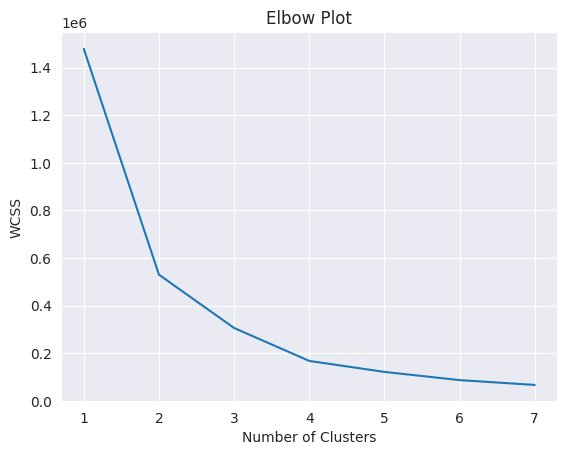

In [ ]:
#Elbow plot
sns.set_style('darkgrid')
plt.plot(range(1,8),wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Based on the elbow plot roughly the number of cluster can be taken as 3**

In [ ]:
#Training the cluster model
kmeans=KMeans(n_clusters=6,init='k-means++',n_init=10,random_state=42)
y=kmeans.fit_predict(X)
print(y[0:10])

[2 2 4 4 4 2 2 4 2 4]


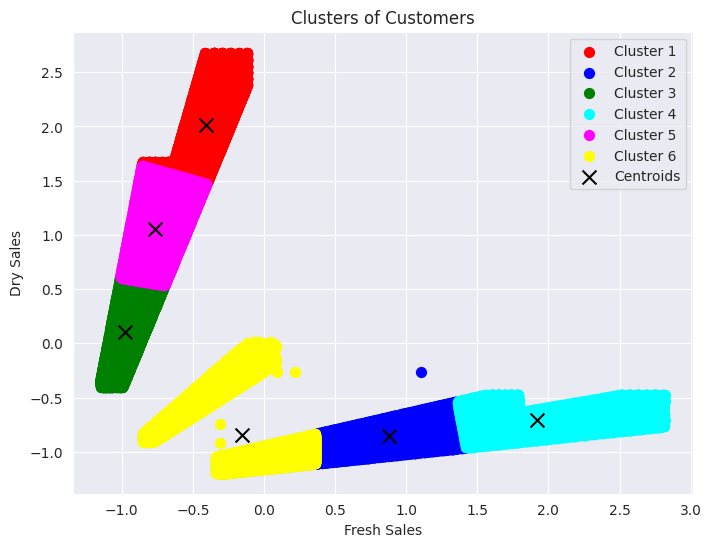

In [ ]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s=50, c='magenta', label='Cluster 5')
plt.scatter(X[y == 5, 0], X[y == 5, 1], s=50, c='yellow', label='Cluster 6')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='x', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Fresh Sales')
plt.ylabel('Dry Sales')
plt.legend()
plt.show()

In [ ]:
# loading the test data set
test_data = pd.read_csv('/content/test_kaggle.csv')

# preprocess the test data
test_data['luxury_sales'] = pd.to_numeric(test_data['luxury_sales'], errors='coerce')
test_data['luxury_sales'] = test_data['luxury_sales'].fillna(test_data['luxury_sales'].mean())
test_data['luxury_sales'] = test_data['luxury_sales'].astype(float)

test_data['fresh_sales'] = pd.to_numeric(test_data['fresh_sales'], errors='coerce')
test_data['fresh_sales'] = test_data['fresh_sales'].fillna(test_data['fresh_sales'].mean())
test_data['fresh_sales'] = test_data['fresh_sales'].astype(float)

test_data['dry_sales'] = pd.to_numeric(test_data['dry_sales'], errors='coerce')
test_data['dry_sales'] = test_data['dry_sales'].fillna(test_data['dry_sales'].mean())
test_data['dry_sales'] = test_data['dry_sales'].astype(float)


X_test = test_data[['luxury_sales', 'dry_sales']].values

# Standardize the features
X_test_scaled = scaler.transform(X_test)

test_predictions = kmeans.predict(X_test_scaled)

# creating a DataFrame for submission
submission_df = pd.DataFrame({'Customer_ID': test_data['Customer_ID'], 'cluster category': test_predictions})

print(submission_df.head())

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


   Customer_ID  cluster category
0        33574                 0
1        10089                 4
2        38329                 2
3        11376                 4
4        12410                 2


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_test_scaled, test_predictions)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4759383997380659


**Saving the model**

In [ ]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']